In [84]:
import sysplot as ssp
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(10)
y = np.sin(x)

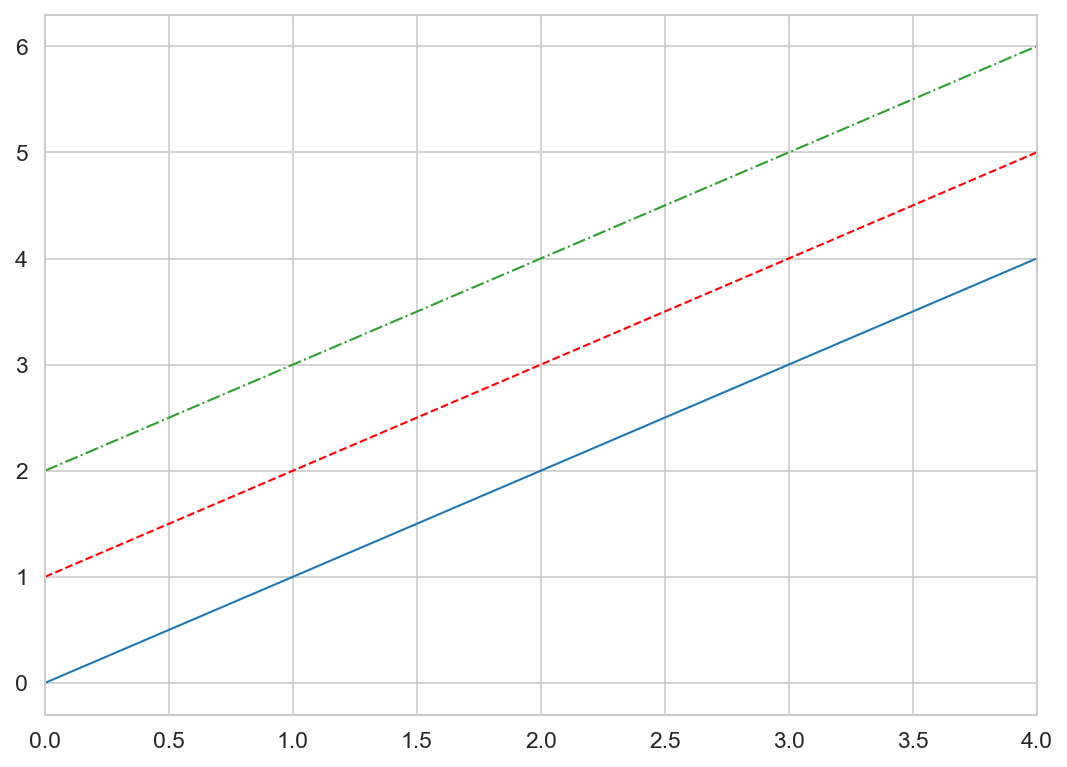

In [67]:
plt.plot(x, y)
plt.plot(x, y+1, color="red")
plt.plot(x, y+2)
plt.show()

In [68]:
style = next(ax._get_lines.prop_cycler)
# AttributeError: '_process_plot_var_args' object has no attribute 'prop_cycler'

style = next(ax._prop_cycle)
# AttributeError: 'Axes' object has no attribute '_prop_cycle'

style = next(ax._get_lines._cycler)
# AttributeError: '_process_plot_var_args' object has no attribute '_cycler'

style = next(iter(ax._get_lines.prop_cycler))
# AttributeError: '_process_plot_var_args' object has no attribute 'prop_cycler'

props = next(ax._get_lines)
# TypeError: '_process_plot_var_args' object is not an iterator

style = ax._get_lines.get_next_color()
style # '#9467bd' this works!

AttributeError: '_process_plot_var_args' object has no attribute 'prop_cycler'

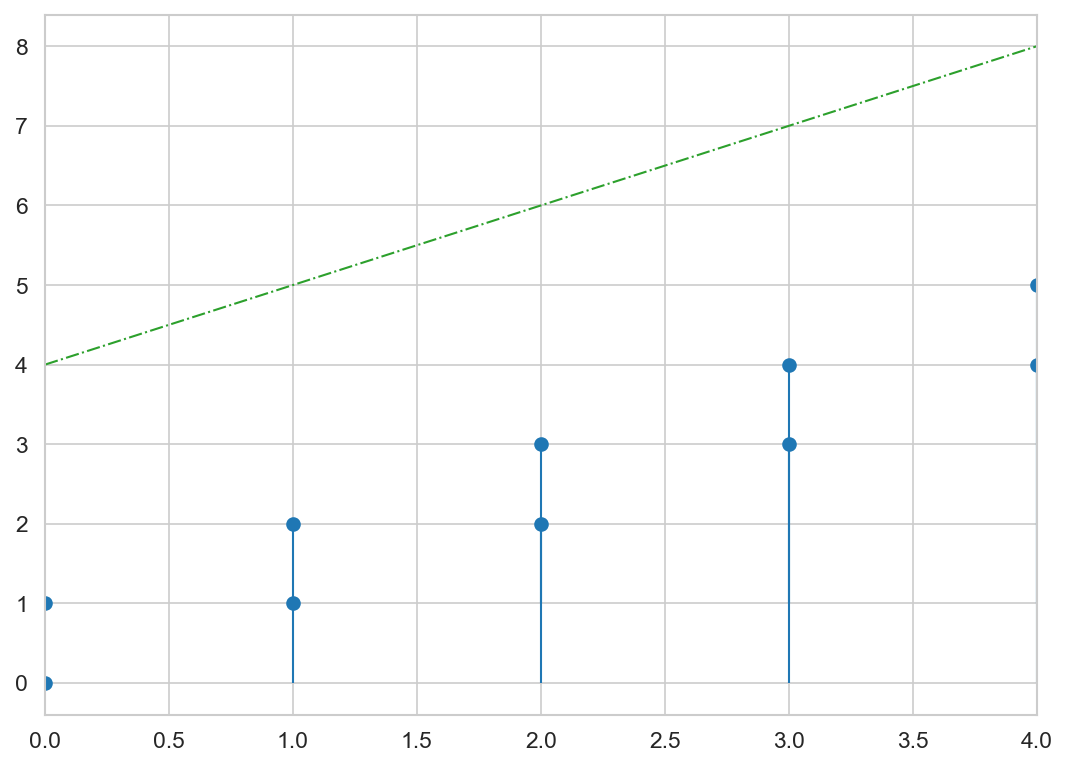

In [69]:
fig, ax = plt.subplots()
plt.stem(x, y, bottom=0, basefmt=" ")   # C0, expected c0
plt.stem(x, y+1, bottom=1, basefmt=" ") # C0, expected c0
plt.plot(x, y+4)                        # C2, expected c2

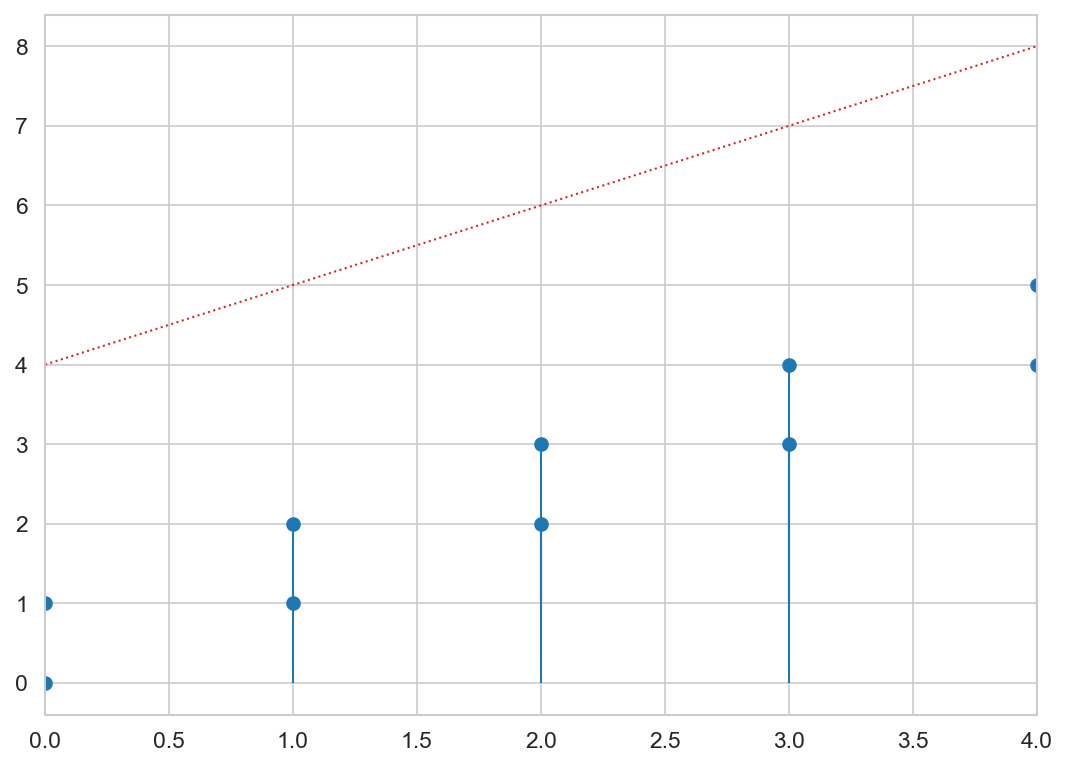

In [70]:
fig, ax = plt.subplots()
plt.stem(x, y, bottom=0, basefmt=" ", linefmt="")   # C0, expected c0
plt.stem(x, y+1, bottom=1, basefmt=" ") # C0, expected c0
plt.plot(x, y+4)                        # C3, expected c2

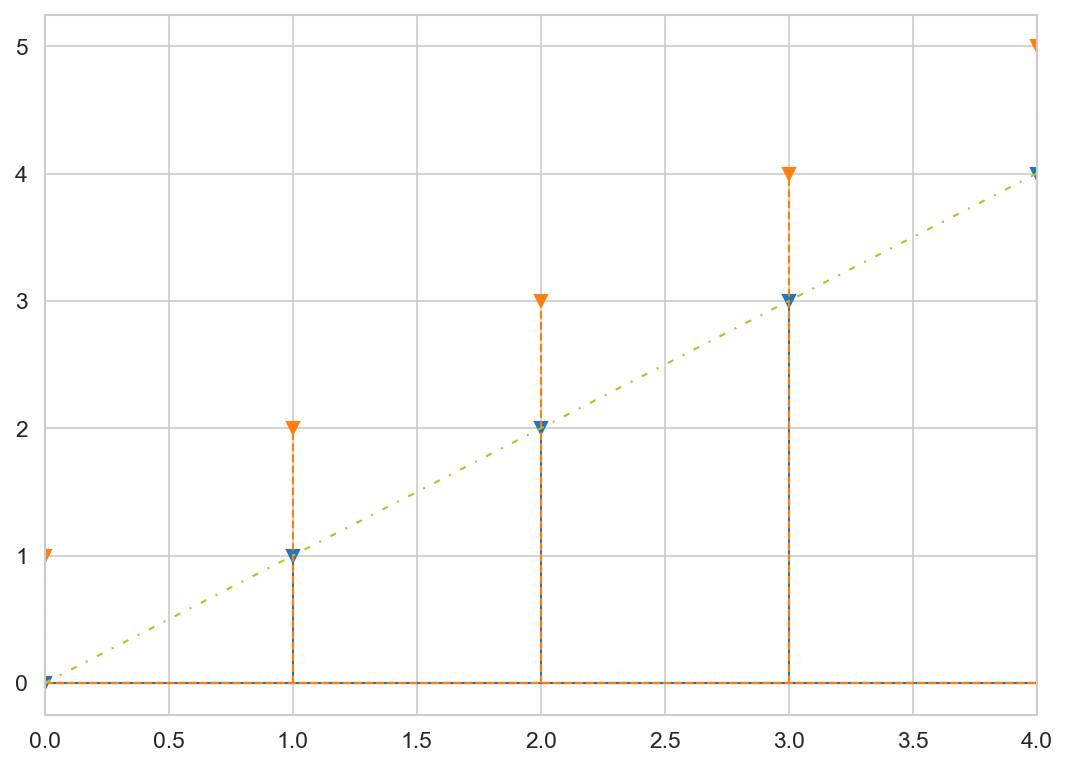

In [71]:
ssp.plot_stem(x, y, markers_outwards=True, marker="v")

ssp.plot_stem(x, y+1, markers_outwards=True, marker="v")

plt.plot(x, y)

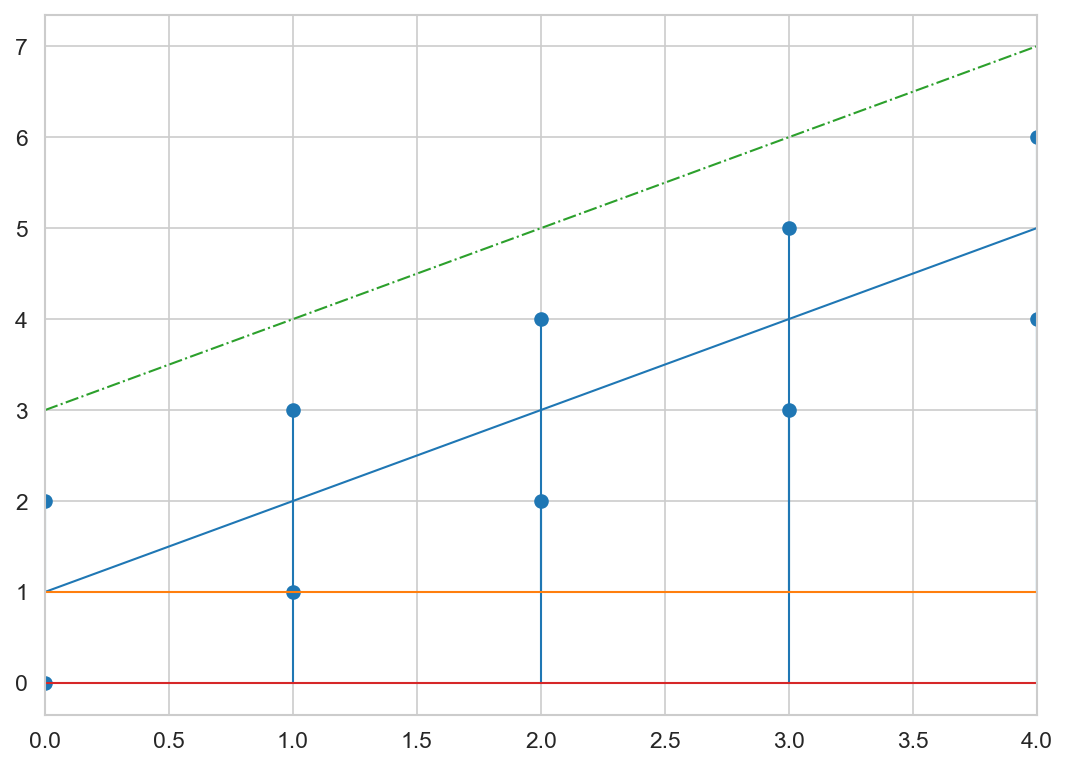

In [72]:
plt.stem(x, y)
plt.plot(x, y+1)
plt.stem(x, y+2, basefmt="", bottom=1)
plt.plot(x, y+3)

In [73]:
import matplotlib as mpl
from cycler import cycler

from typing import TypedDict
from typing import cast, Union, Tuple


ColorTypeHint = Union[
    str,
    Tuple[float, float, float],
    Tuple[float, float, float, float]
]

class PlotStyle(TypedDict):
    color: ColorTypeHint
    linestyle: Union[str, tuple[int, ...]]

# TODO: implement default color palette?
# TODO implement default gray filled area with transparency?

# Global style configuration
_DEFAULT_COLORS = mpl.rcParamsDefault['axes.prop_cycle'].by_key()['color']
"""list[str]: Color palette extracted from current Matplotlib color cycle."""

LINE_STYLES = [
    '-',                    # solid
    '--',                   # dashed
    '-.',                   # dash-dot
    ':',                    # dotted
    (0, (3, 1, 1, 1)),     # densely dashdotted
    (0, (5, 5)),           # dashed
    (0, (1, 1)),           # densely dotted
    (0, (5, 1)),           # densely dashed
    (0, (3, 5, 1, 5)),     # dashdotted
    (0, (1, 10)),          # loosely dotted
]
"""list: Line style patterns for plot cycling.

Each entry is either a string shorthand ('-', '--', etc.) or a tuple defining
custom dash patterns as (offset, (on, off, on, off, ...)).
"""

# Validate configuration
if len(_DEFAULT_COLORS) != len(LINE_STYLES):
    raise ValueError(f"Color palette length ({len(_DEFAULT_COLORS)}) does not match number of line styles ({len(LINE_STYLES)}).")

# Build and apply custom style cycler
_custom_cycler = cycler(color=_DEFAULT_COLORS) + cycler(linestyle=LINE_STYLES)
_styles = list(_custom_cycler)
mpl.rcParams['axes.prop_cycle'] = _custom_cycler

# Minimal flip table: only define one direction
_FLIPPED_MARKERS_BASE = {
    '^': 'v',  # up triangle → down triangle
    '>': '<',  # right triangle → left triangle
}

# Auto-generated full flip table (bidirectional mapping)
FLIPPED_MARKERS = {
    **_FLIPPED_MARKERS_BASE,
    **{v: k for k, v in _FLIPPED_MARKERS_BASE.items()}
}

In [74]:
_COLOR_TO_STYLE = {s["color"]: s for s in _styles}
# TODO: use this mapping for efficient lookup instead of iterating through the list each time

def _get_linestyle_for_color(color):
    style = _COLOR_TO_STYLE.get(color)
    if style is not None:
        return style["linestyle"]
    raise ValueError(f"Color {color} not found in custom cycler.")

_get_linestyle_for_color('#9467bd')

(0, (3, 1, 1, 1))

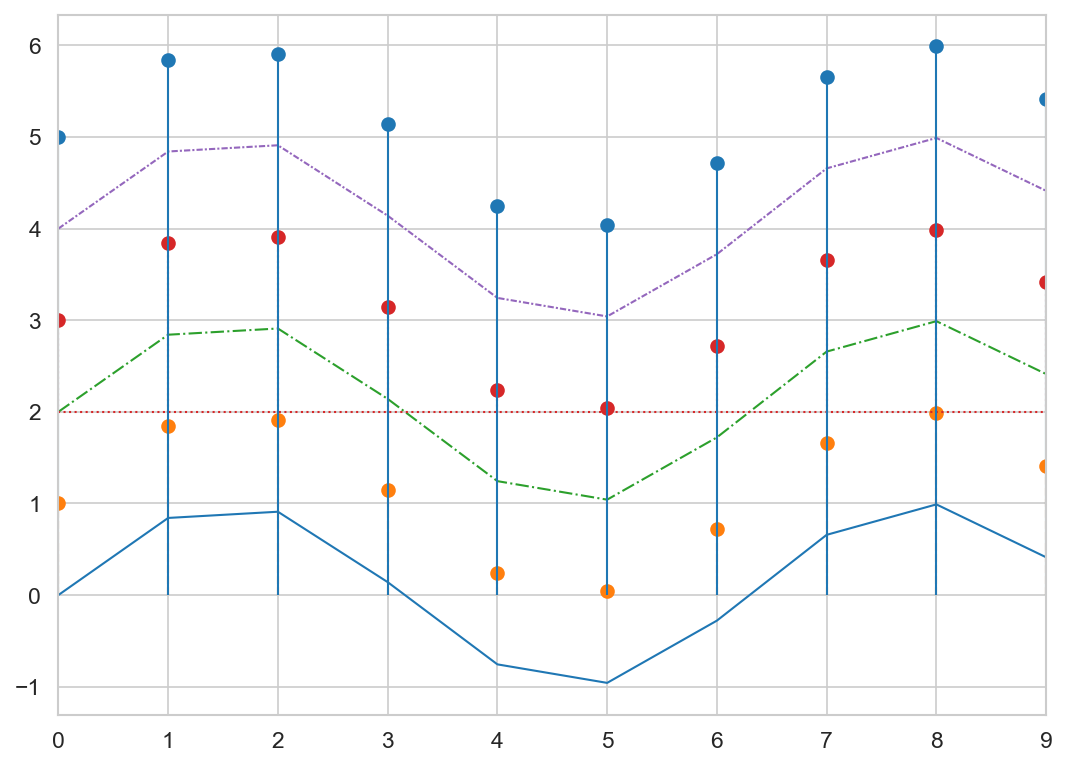

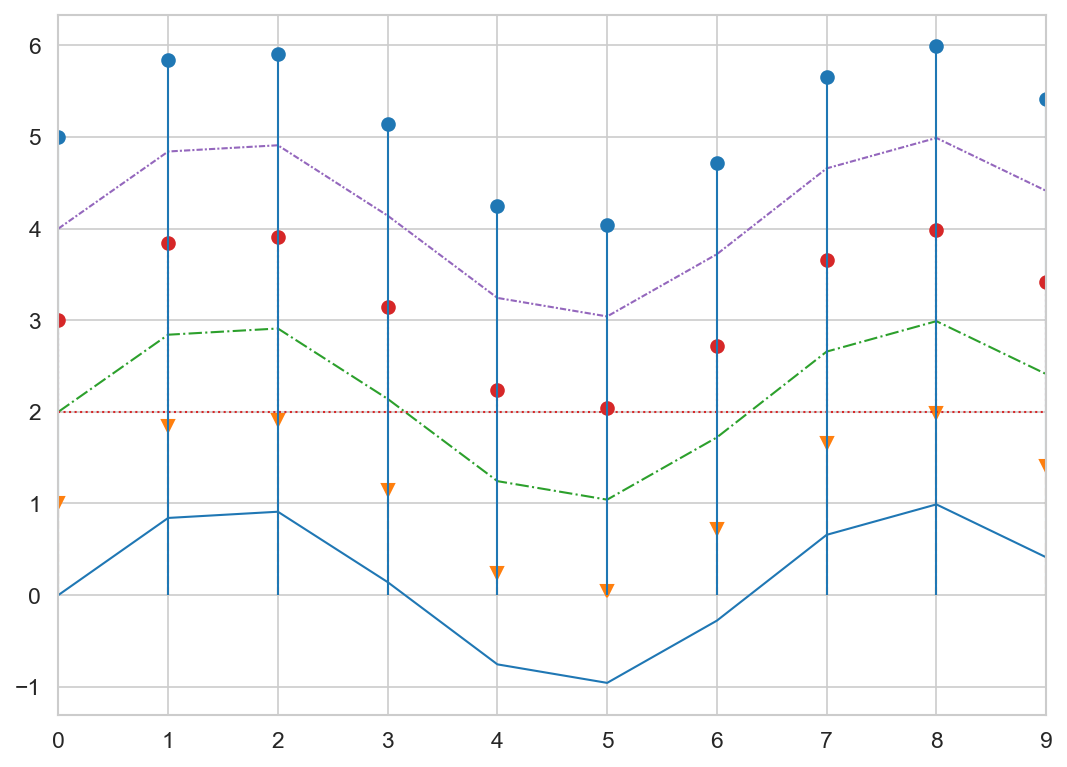

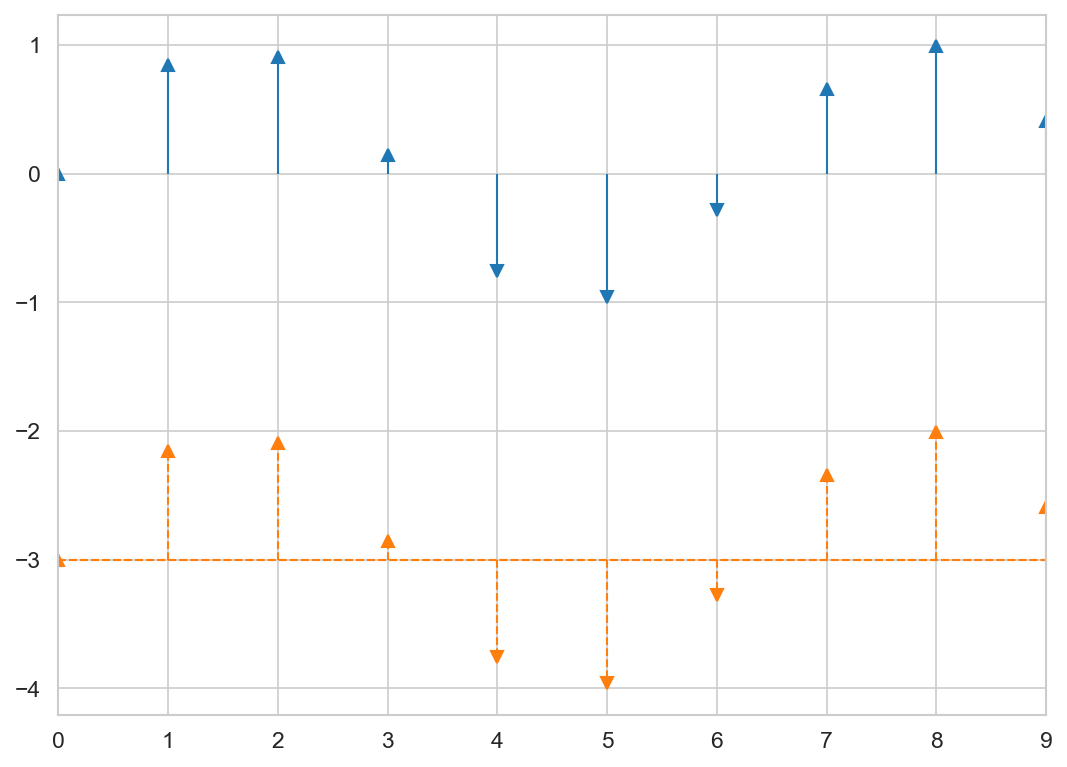

In [91]:
def plot_stem_test(x, y, ax=None, label=None, bottom=0, marker="o", markersize=6, show_baseline=False, style_index=None, markers_outwards=False):

    if ax is None:
        ax = plt.gca()

    if style_index is None:
        color = ax._get_lines.get_next_color()
        linestyle = _get_linestyle_for_color(color)
    else:
        style = _styles[style_index % len(_styles)]
        color = style["color"]
        linestyle = style["linestyle"]

    if markers_outwards:        
        up_stems = np.where(y >= bottom, y, np.nan)
    else:
        up_stems = y
        
    markerline, stemlines, baseline_line = ax.stem(x, up_stems, bottom=bottom, label=label)
    plt.setp(markerline, color=color, marker=marker, markersize=markersize)
    plt.setp(stemlines, color=color, linestyle=linestyle)
    if show_baseline:
        plt.setp(baseline_line, color=color, linestyle=linestyle)
    else:
        baseline_line.set_visible(False)

    if markers_outwards:
        down_stems = np.where(y < bottom, y, np.nan)
        flipped_marker = FLIPPED_MARKERS[marker]

        markerline, stemlines, baseline_line = ax.stem(x, down_stems, bottom=bottom)
        plt.setp(markerline, color=color, marker=flipped_marker, markersize=markersize)
        plt.setp(stemlines, color=color, linestyle=linestyle)
        if show_baseline:
            plt.setp(baseline_line, color=color, linestyle=linestyle)
        else:
            baseline_line.set_visible(False)
    



fig, ax = plt.subplots()
plt.plot(x, y)  # expected c0, got c0
plot_stem_test(x, y+1, ax=ax) # expected c1, got c1
plt.plot(x, y+2)  # expected c2, got c2
plot_stem_test(x, y+3, ax=ax, show_baseline=True, bottom=2) # expected c3, got c3
plt.plot(x, y+4)  # expected c4, got c4
plot_stem_test(x, y+5, ax=ax, style_index=0) # expected c0, got c0
plt.show()

fig, ax = plt.subplots()
plt.plot(x, y)  # expected c0, got c0
plot_stem_test(x, y+1, ax=ax, markers_outwards=True, marker="v") # expected c1 2 times, got c1 2 times
plt.plot(x, y+2)  # expected c2, got c2
plot_stem_test(x, y+3, ax=ax, show_baseline=True, bottom=2) # expected c3, got c3
plt.plot(x, y+4)  # expected c4, got c4
plot_stem_test(x, y+5, ax=ax, style_index=0) # expected c0, got c0
plt.show()

plot_stem_test(x, y, markers_outwards=True, marker="^")
plot_stem_test(x, y-3, markers_outwards=True, marker="^", show_baseline=True, bottom=-3)